In [2]:
%matplotlib inline
from plots import *
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use("bmh")

In [3]:
i = 0
PATH = 'neurips/ag-10runs/log/log-ag-10runs-%dround.txt' % i
df = pd.read_csv(PATH, sep=',  ', engine='python')
SAMPLE_SIZE = 10

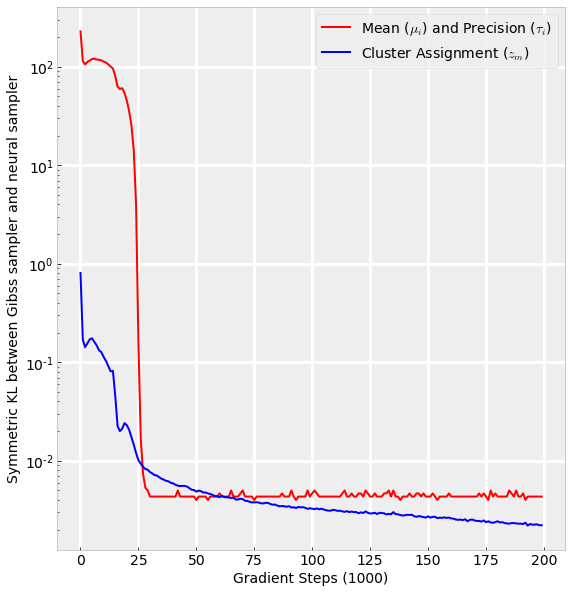

In [4]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1, 2, 2)
ax1.set_yscale("log")
ax1.plot((df["KL_eta_ex"].values + df["KL_eta_in"].values) / 3, 'r', label=r'Mean ($\mu_i$) and Precision ($\tau_i$)')
ax1.plot((df["KL_z_ex"].values + df["KL_z_in"].values) / 60 , 'b', label=r'Cluster Assignment ($z_m$)')
ax1.legend(fontsize=14)
ax1.tick_params(labelsize=14)
ax1.set_ylabel("Symmetric KL between Gibss sampler and neural sampler",fontsize=14)
ax1.set_xlabel('Gradient Steps (1000)', fontsize=14)
ax1.grid(color='w', linestyle='-', linewidth=3)

In [7]:
## DB_eta is kl divergence for 3 global variables
## DB_z is kl divergence for 60 local variables
## ess is ESS 
## put two KL plots in one figure, using label to denote each one
## divide DB_eta / 3, divide DB_z / 60
## each array is 10 * 11, we filter out the first column, i.e. array[:, 1:]
# each row is an individual experiemnt, 
DB_eta = np.load('neurips/ag-10runs/test/test-10runs-DB-eta.npy')
DB_z = np.load('neurips/ag-10runs/test/test-10runs-DB-z.npy')
ess = np.load('neurips/ag-10runs/test/test-10runs-ess.npy')
NUM_SAMPLES = 10

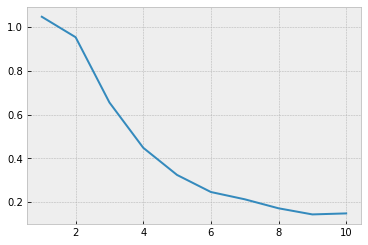

In [13]:
## 
plt.plot(np.arange(10) + 1, DB_eta[0, 1:] / 3)
plt.xlabel('Update')
plt.ylabel("KL Divergence")
plt.title('Detailed Balance')

ValueError: x and y must have same first dimension, but have shapes (10,) and (11,)

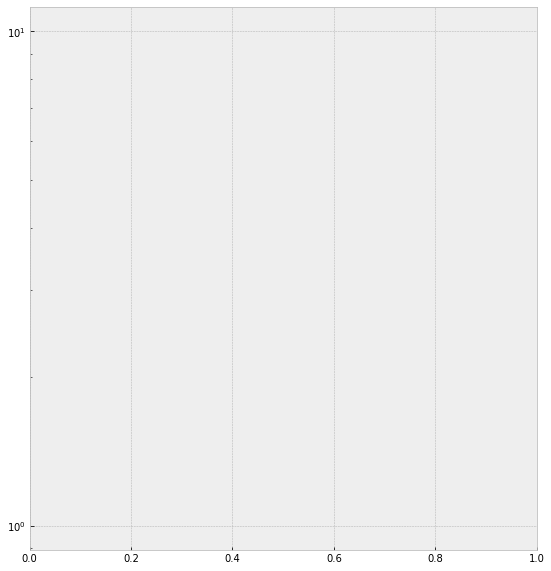

In [8]:
fig = plt.figure(figsize=(20, 10))
steps = np.arange(10) + 1
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_yscale("log")
ax1.plot(steps, DB_eta.mean(0), 'r', label='mu')
ax1.plot(steps, DB_z.mean(0), 'b', label='z')
ax1.tick_params(labelsize=14)
ax1.legend(fontsize=14)
ax1.set_xlabel('Update Steps', fontsize=14)
ax1.set_ylabel("Symmetric KL on detailed balance", fontsize=14)

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(steps, ess.mean(0)[1:] / NUM_SAMPLES, 'r', label='mu')
ax2.legend(fontsize=14)
ax2.tick_params(labelsize=14)
ax2.set_ylabel("Effective Sample Size / Total Number of Samples",fontsize=14)
ax2.set_xlabel('Update Steps', fontsize=14)
ax1.grid(color='w', linestyle='-', linewidth=3)
ax2.grid(color='w', linestyle='-', linewidth=3)
plt.savefig('results/DB-' + PATH + '.svg')